In [1]:
import pandas as pd
from matplotlib import font_manager,rc
import seaborn as sns 
from bs4 import BeautifulSoup 
import random
sns.set_style("whitegrid")
path = "c:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)    
def html(x): 
    return  BeautifulSoup(x,'html.parser').get_text() 
from konlpy.tag import Okt
okt = Okt()

In [2]:
M = pd.read_csv('MBN00003U_10_2006.csv',encoding='euc-kr')[2:] 
M['len'] =  M.ART_CN.apply(lambda x: len(str(x))) 
M = M[M['len']>50] # 본문 내용이 50자 이하인 내용 제거

In [3]:
M.ART_CN.isnull().sum() # 누락값 확인 
M = M[M.ART_CN.notnull()]
M.ART_CN = M.ART_CN.apply(lambda x : html(x)) 
M.ART_CN = M.ART_CN.apply(lambda x : x.replace('\\','').replace('< Copyright ⓒ mbn. 무단전재 및 재배포 금지 >','').replace('  ',''))
M.ART_CN = M.ART_CN.apply(lambda x : okt.nouns(x)) # 단어를 공백으로 분리

In [4]:
def islen2(x): # 리스트에서 1글자 이상인것만 남기는 함수 정의 
    return len(x)>1  
def isStartN(x): # 숫자로 시작하는 항목 제거 
    return not x.startswith(tuple('0123456789')) 

M.ART_CN = M.ART_CN.apply(lambda x : list(filter(islen2, x)))  
M.ART_CN = M.ART_CN.apply(lambda x : list(filter(isStartN, x))) 

In [5]:
stop_word_list = ['지난','별로','반면','대부분','대해','때문','일부','포인트','지수'] 
def stoplist(x): # 숫자로 시작하는 항목 제거 
    return not x in stop_word_list 
M.ART_CN = M.ART_CN.apply(lambda x : list(filter(stoplist, x))) 

In [6]:
M.ART_CN = M.ART_CN.apply(lambda x : str(x)[2:-2].replace(',','').replace("'",'')) 
M.ART_CN

2       영업 이익 대비 증가 오늘 영업 이익 증가 매출 매출 영업 이익 검색 광고 매출 배...
3       증권 투자 각광 인도 중국 일본 투자 월드 드림 펀드랩 상품 출시 이번 상품 환매 ...
4       디지털 휴대폰 저장장치 제조 에이치 앤티 매출 영업 이익 매출 분기 가량 영업 이익...
5       오늘 약세 출발 코스피 지금 상승세 주말 주가 급등 이익 실현 심리 통화정책 불확실...
6       증권 사용자 화면 직접 사용 서비스 출시 서비스 이용 화면 여러 복수 종목 동시 주...
7       투자 증권 모비스 주가 기초자산 파생상품 투자 대한 퍼스트 클래스 투스타 펀드 모집...
8       리츠 증권 베이비붐 세대 대상 은퇴 재무 설계 서비스 시작 서비스 은퇴 재무 설계 ...
9       코스피 보합 등락 보이 현재 코스피 기록 시가총액 상위 종목 전자 하이닉스반도체 필...
11      코스피 보합 등락 보이 외국인 선물 이상 매수 현물 매도 개인 매도 기관 바탕 프로...
13      주가 동반 하락 코스피 외국인 현물 매도 부담 다시 아래 코스닥 시장 기관 외국인 ...
14      코스피 나흘 하락 다시 아래 주가 외국인 현물 시장 매도 우위 하락 기록 기가스 철...
15      정보통 기기 전문 제조업체 한창 오늘 공시 통해 자회사 한창 설립 한창 한창 주요 ...
16      산적 암초 롯데 쇼핑 우리홈쇼핑 인수 롯데 쇼핑 주가 도움 지적 홈쇼핑 업계 역시 ...
18          인터넷 포털 업체 매출 영업 손실 발생 적자 다만 매출 작년 기간 분기 개선 모습
19      오늘 약세 출발 주식시장 지금 보합 움직 외국인 이틀 매도 우위 보이 개인 기관 프...
20      텔레콤 매출 영업 이익 경상 이익 적자 각각 기록 텔레콤 매출 작년 기간 영업 이익...
21      외환은행 상반기 회사 설립 이후 최대 규모 기록 작년 상반기 백억원 증가 순이익 크...
23      한국 투신 

(-0.5, 799.5, 599.5, -0.5)

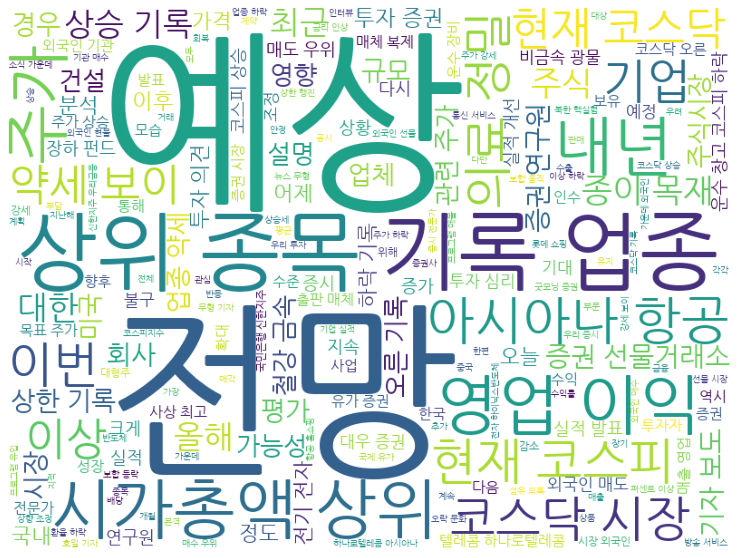

In [8]:
from wordcloud import WordCloud 
import os
import matplotlib.pyplot as plt
font_path = os.path.join('', 'NanumGothic.ttf')
cloud = WordCloud(font_path = font_path,background_color='white', width=800, height=600).generate(" ".join(M["ART_CN"]))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [9]:
import numpy as np
bindo = pd.Series(" ".join(M["ART_CN"]).split(' ')).value_counts()[:50]

In [10]:
bindo = pd.DataFrame(bindo).reset_index()

In [11]:
bindo

,index,0
0,증권,2043
1,하락,1846
2,상승,1651
3,업종,1650
4,주가,1313
5,시장,1302
6,기록,1250
7,외국인,1074
8,코스닥,1037
9,투자,998


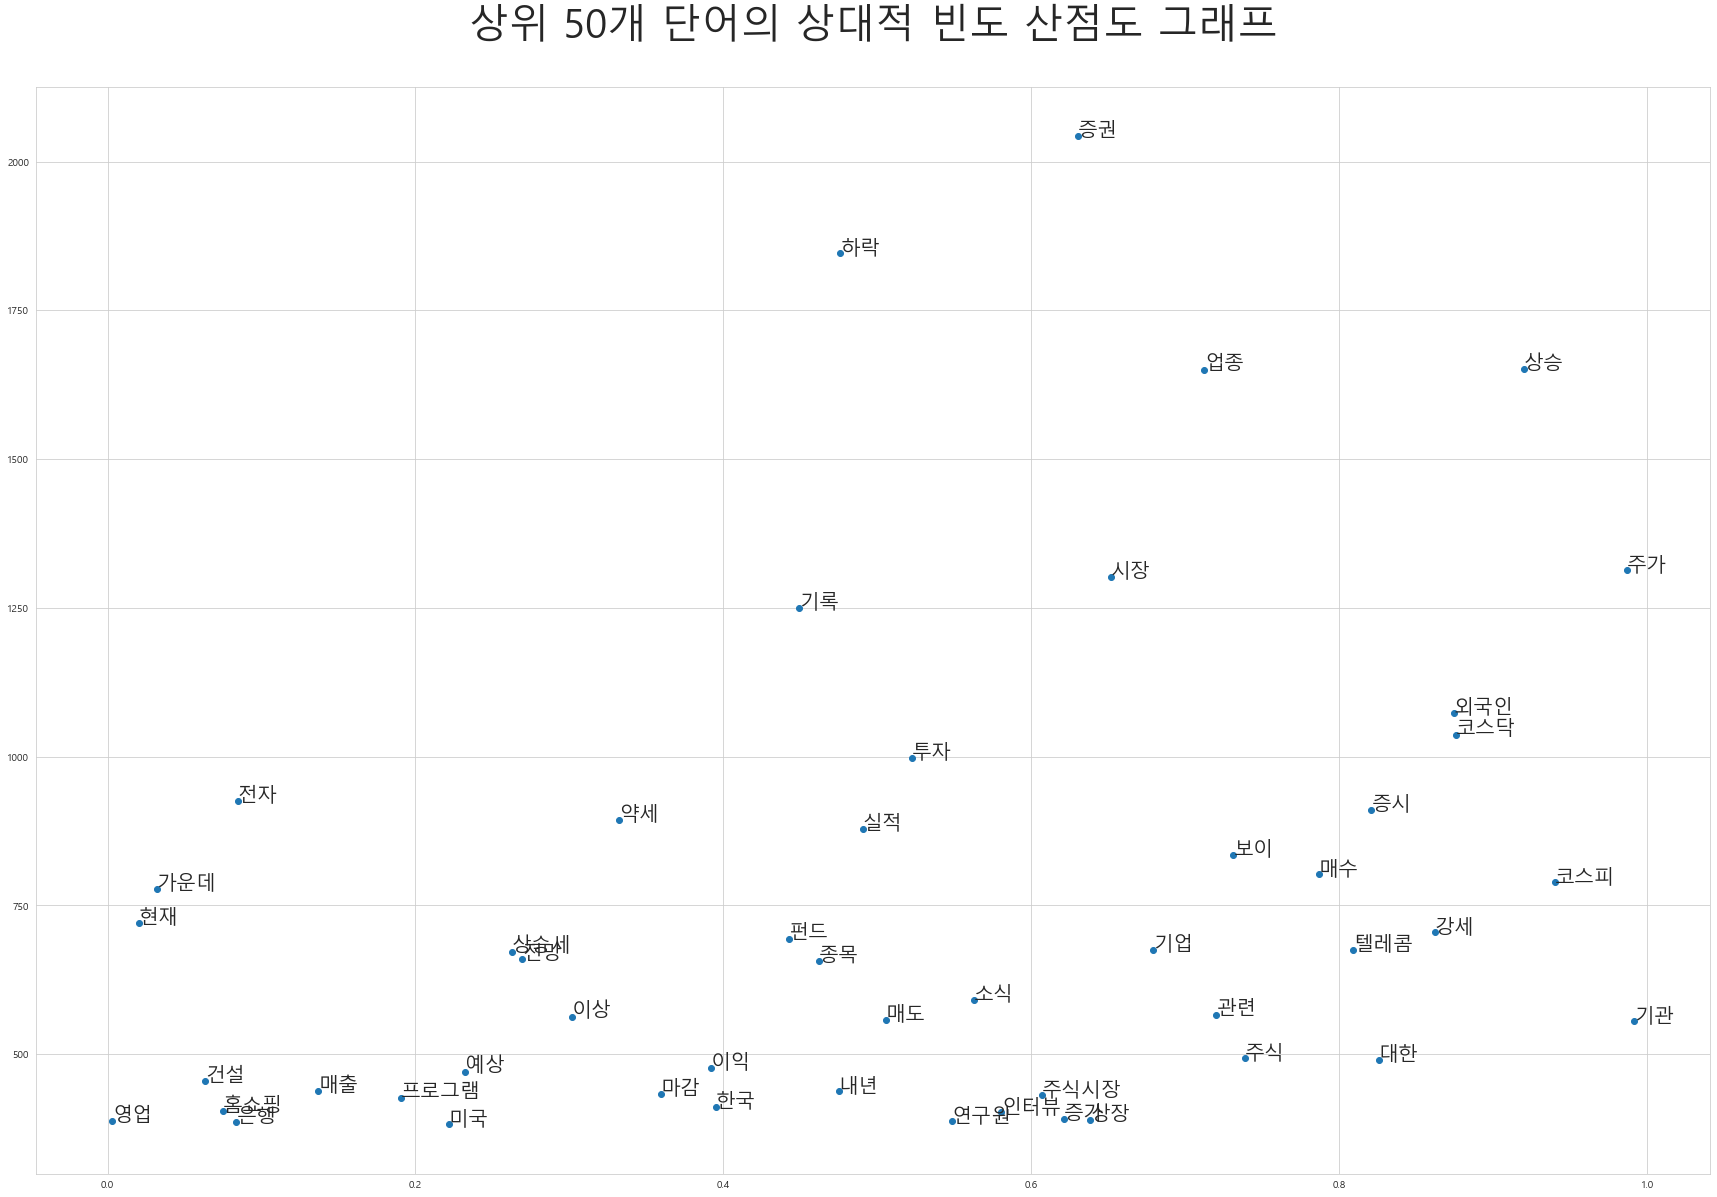

In [12]:
y = bindo[0]
z = np.random.rand(100)[:50]
n = bindo['index']

fig, ax = plt.subplots(figsize=(30,20))
ax.set_title("상위 50개 단어의 상대적 빈도 산점도 그래프",pad=50,fontsize=40)
ax.scatter(z, y,)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]),fontsize=20)

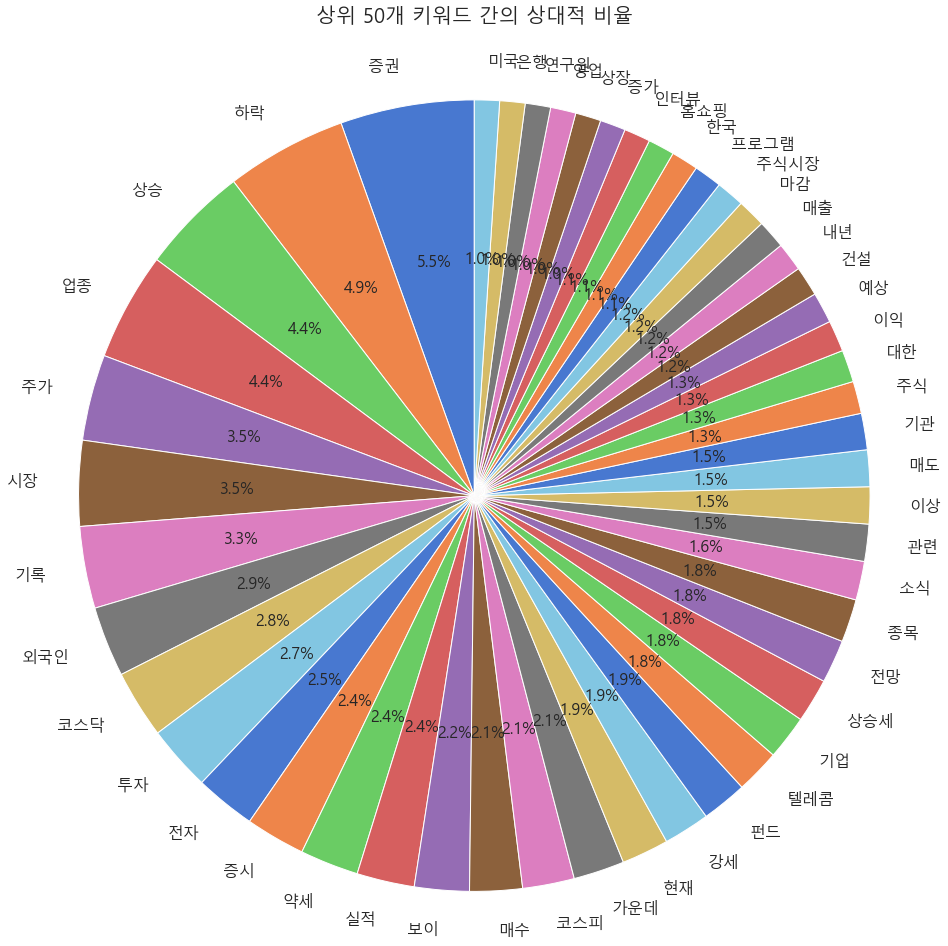

In [13]:
colors = sns.color_palette('muted')
labels = bindo['index'] 
ratio = bindo[0] 
plt.figure(figsize=(13,13))
plt.title('상위 50개 키워드 간의 상대적 비율',fontdict={"fontsize":20},pad=120)
plt.pie(ratio, labels=labels, shadow=False, startangle=90, autopct='%1.1f%%',textprops={"fontsize":16},radius = 1.4, colors=colors) 
plt.show()

# 제목 키워드 

In [14]:
M = pd.read_csv('MBN00003U_10_2006.csv',encoding='euc-kr')[2:] 
M

,MBN_MDA_SP_CD,MDA_ART_ESSN_NO,MDA_CGR_NM,ART_DATE,ART_SJ_CN,ART_CN,ATCH_IMG_NM,JRNL_NM,WRT_DATE
2,MBN,112215,mbn00004,2006,NHN 2분기 영업이익 8.6% 증가,NHN의 2분기 영업이익이 1분기 대비 8.6% 증가한 것으로 나타났습니다.<br ...,NaN,NaN,20060801
3,MBN,112229,mbn00004,2006,"동양증권, \'월드드림 펀드랩\' 출시","동양증권이 새로운 투자처로 각광 받고 있는 인도와 중국, 일본에 투자하는 \'월드드...",NaN,NaN,20060801
4,MBN,112231,mbn00004,2006,"에이치앤티, 2분기 영업익 151% 증가",디지털TV와 휴대폰 용 저장장치를 제조하는 에이치앤티는 지난 2분기동안 384억원 ...,NaN,NaN,20060801
5,MBN,112233,mbn00004,2006,10시 시황,오늘 약세로 출발한 코스피 지수가 지금은 상승세를 나타내고 있습니다.<br /><b...,NaN,NaN,20060801
6,MBN,112261,mbn00004,2006,"대신증권, 사용자 구성 \'주문 매트릭스\'출시",대신증권은 사용자가 원하는 주문화면을 직접 만들어 사용할 수 있는 새로운 주문서비스...,NaN,NaN,20060801
7,MBN,112307,mbn00004,2006,"대투, \'현대모비스+KT&G ELF\' 모집",대한투자증권은 현대모비스와 KT&G의 주가를 기초자산으로 하는 파생상품에 투자하는 ...,NaN,NaN,20060801
8,MBN,112309,mbn00004,2006,"메리츠, 은퇴 재무설계 서비스 시작",메리츠증권은 43세부터 52세의 베이비붐 세대를 대상으로 은퇴 재무설계 서비스를 시...,NaN,NaN,20060801
9,MBN,112341,mbn00004,2006,12시 시황,코스피 지수가 보합권에서 등락을 보이고 있습니다.<br /><br /> 12시 현...,NaN,NaN,20060801
10,MBN,112348,mbn00004,2006,이시각 주식시장,- 이시각 주식시장,NaN,NaN,20060801
11,MBN,112367,mbn00004,2006,2시 시황,코스피 지수가 보합권에서 등락을 보이고 있습니다.<br /><br /> 외국인들이...,NaN,NaN,20060801


In [15]:
M['title_len'] =  M.ART_CN.apply(lambda x: len(str(x))) 
M = M[M['title_len']>10] # 제목 내용이 10자 이하인 내용 제거

In [16]:
M.ART_SJ_CN.isnull().sum() # 누락값 확인 
M = M[M.ART_SJ_CN.notnull()]
M.ART_SJ_CN = M.ART_SJ_CN.apply(lambda x : html(x)) 
M.ART_SJ_CN = M.ART_SJ_CN.apply(lambda x : x.replace('\\','').replace('< Copyright ⓒ mbn. 무단전재 및 재배포 금지 >','').replace('  ',''))
M.ART_SJ_CN = M.ART_SJ_CN.apply(lambda x : okt.nouns(x)) # 단어를 공백으로 분리

In [17]:
M.ART_SJ_CN

2                          [영업, 이익, 증가]
3             [동양, 증권, 월드, 드림, 펀드랩, 출시]
4                  [에이치, 앤티, 영업, 익, 증가]
5                                   [황]
6       [대신, 증권, 사용자, 구성, 주문, 매트릭스, 출시]
7                      [투, 현대, 모비스, 모집]
8          [메, 리츠, 은퇴, 재무, 설계, 서비스, 시작]
9                                   [황]
11                                  [황]
12                          [증시, 하이라이트]
13                         [주가, 나흘, 하락]
14                              [마감, 황]
15                    [한창, 자회사, 한창, 설립]
16                  [우리홈쇼핑, 인수, 주가, 부정]
18                             [적자, 전환]
19                                  [황]
20                            [백억원, 적자]
21                         [외환, 상반기, 익]
23               [한국, 운용, 에너지, 홀딩스, 체결]
24                         [보호, 예수, 물량]
25                 [코스닥, 기업, 개사, 퇴, 위기]
26                  [동양메이저, 지주사, 전환, 듯]
27                             [다시, 근접]
28                          [증시, 하이라이트]
29                       [이동, 통신사, 하반기]


In [18]:
def islen2(x): # 리스트에서 1글자 이상인것만 남기는 함수 정의 
    return len(x)>1  
def isStartN(x): # 숫자로 시작하는 항목 제거 
    return not x.startswith(tuple('0123456789')) 

M.ART_SJ_CN = M.ART_SJ_CN.apply(lambda x : list(filter(islen2, x)))  
M.ART_SJ_CN = M.ART_SJ_CN.apply(lambda x : list(filter(isStartN, x))) 

In [19]:
stop_word_list = ['지난','별로','반면','대부분','대해','때문','일부','포인트','지수'] 
def stoplist(x): # 숫자로 시작하는 항목 제거 
    return not x in stop_word_list 
M.ART_SJ_CN = M.ART_SJ_CN.apply(lambda x : list(filter(stoplist, x))) 

In [20]:
M.ART_SJ_CN = M.ART_SJ_CN.apply(lambda x : str(x)[2:-2].replace(',','').replace("'",'')) 
M.ART_SJ_CN

2                      영업 이익 증가
3            동양 증권 월드 드림 펀드랩 출시
4                  에이치 앤티 영업 증가
5                              
6       대신 증권 사용자 구성 주문 매트릭스 출시
7                     현대 모비스 모집
8            리츠 은퇴 재무 설계 서비스 시작
9                              
11                             
12                     증시 하이라이트
13                     주가 나흘 하락
14                           마감
15                 한창 자회사 한창 설립
16               우리홈쇼핑 인수 주가 부정
18                        적자 전환
19                             
20                       백억원 적자
21                       외환 상반기
23             한국 운용 에너지 홀딩스 체결
24                     보호 예수 물량
25                 코스닥 기업 개사 위기
26                 동양메이저 지주사 전환
27                        다시 근접
28                     증시 하이라이트
29                   이동 통신사 하반기
30              보호 예수 해제 물량 주의보
32                             
33                     다음 흑자 전환
34                        영업 증가
35                             
                 ...           
2005    

(-0.5, 799.5, 599.5, -0.5)

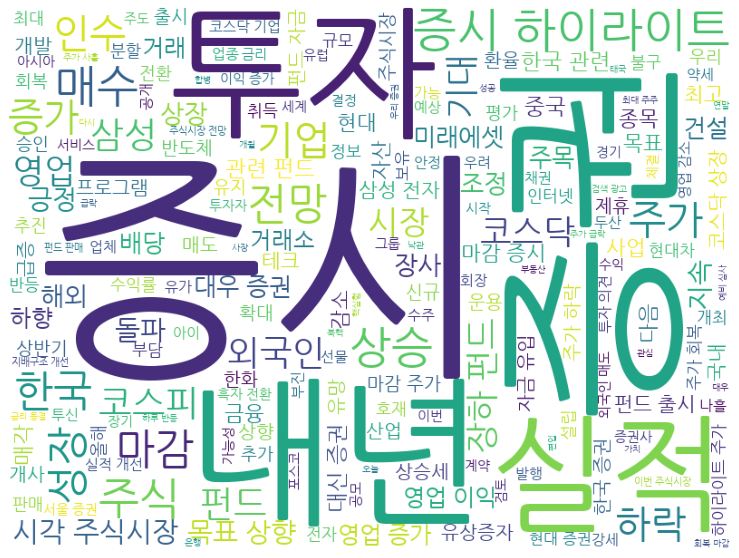

In [21]:
from wordcloud import WordCloud 
import os
import matplotlib.pyplot as plt
font_path = os.path.join('', 'NanumGothic.ttf')
cloud = WordCloud(font_path = font_path, background_color='white',width=800, height=600).generate(" ".join(M["ART_SJ_CN"]))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

# 날짜별, 요일별 뉴스 수 카운팅 

In [22]:
M = pd.read_csv('MBN00003U_10_2006.csv',encoding='euc-kr')[2:] 
M

,MBN_MDA_SP_CD,MDA_ART_ESSN_NO,MDA_CGR_NM,ART_DATE,ART_SJ_CN,ART_CN,ATCH_IMG_NM,JRNL_NM,WRT_DATE
2,MBN,112215,mbn00004,2006,NHN 2분기 영업이익 8.6% 증가,NHN의 2분기 영업이익이 1분기 대비 8.6% 증가한 것으로 나타났습니다.<br ...,NaN,NaN,20060801
3,MBN,112229,mbn00004,2006,"동양증권, \'월드드림 펀드랩\' 출시","동양증권이 새로운 투자처로 각광 받고 있는 인도와 중국, 일본에 투자하는 \'월드드...",NaN,NaN,20060801
4,MBN,112231,mbn00004,2006,"에이치앤티, 2분기 영업익 151% 증가",디지털TV와 휴대폰 용 저장장치를 제조하는 에이치앤티는 지난 2분기동안 384억원 ...,NaN,NaN,20060801
5,MBN,112233,mbn00004,2006,10시 시황,오늘 약세로 출발한 코스피 지수가 지금은 상승세를 나타내고 있습니다.<br /><b...,NaN,NaN,20060801
6,MBN,112261,mbn00004,2006,"대신증권, 사용자 구성 \'주문 매트릭스\'출시",대신증권은 사용자가 원하는 주문화면을 직접 만들어 사용할 수 있는 새로운 주문서비스...,NaN,NaN,20060801
7,MBN,112307,mbn00004,2006,"대투, \'현대모비스+KT&G ELF\' 모집",대한투자증권은 현대모비스와 KT&G의 주가를 기초자산으로 하는 파생상품에 투자하는 ...,NaN,NaN,20060801
8,MBN,112309,mbn00004,2006,"메리츠, 은퇴 재무설계 서비스 시작",메리츠증권은 43세부터 52세의 베이비붐 세대를 대상으로 은퇴 재무설계 서비스를 시...,NaN,NaN,20060801
9,MBN,112341,mbn00004,2006,12시 시황,코스피 지수가 보합권에서 등락을 보이고 있습니다.<br /><br /> 12시 현...,NaN,NaN,20060801
10,MBN,112348,mbn00004,2006,이시각 주식시장,- 이시각 주식시장,NaN,NaN,20060801
11,MBN,112367,mbn00004,2006,2시 시황,코스피 지수가 보합권에서 등락을 보이고 있습니다.<br /><br /> 외국인들이...,NaN,NaN,20060801


In [23]:
M.WRT_DATE = pd.to_datetime(M.WRT_DATE.astype(str))

In [24]:
M['count'] = 1

In [25]:
M.groupby('WRT_DATE').sum()

,MDA_ART_ESSN_NO,ART_DATE,ATCH_IMG_NM,JRNL_NM,count
WRT_DATE,,,,,
2006-08-01,1685072,30090,0.0,0.0,15
2006-08-02,1577965,28084,0.0,0.0,14
2006-08-03,1808447,32096,0.0,0.0,16
2006-08-04,2725149,48144,0.0,0.0,24
2006-08-06,113583,2006,0.0,0.0,1
2006-08-07,1935537,34102,0.0,0.0,17
2006-08-08,1484744,26078,0.0,0.0,13
2006-08-09,1947187,34102,0.0,0.0,17
2006-08-10,2183998,38114,0.0,0.0,19


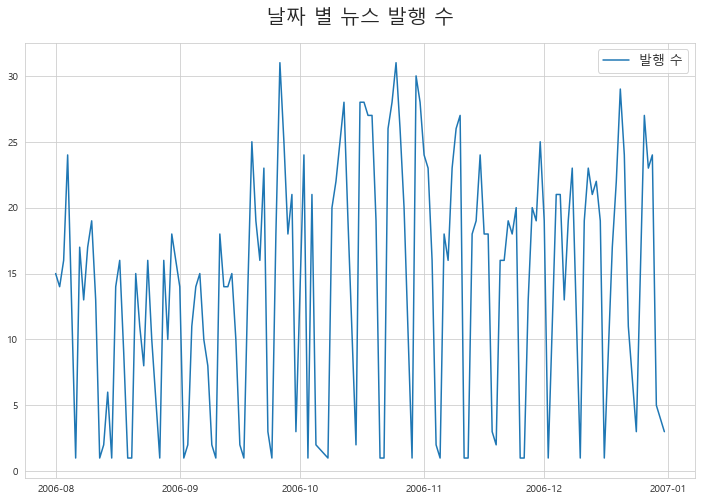

In [26]:
plt.figure(figsize=(12,8)) 
plt.title('날짜 별 뉴스 발행 수',fontsize=20,pad=20) 
plt.plot(pd.to_datetime(M.groupby('WRT_DATE').sum().index.astype('str')),M.groupby('WRT_DATE').sum()['count'],label='발행 수')
plt.legend(fontsize= 13, loc='best')
plt.show()

In [27]:
M['day'] = M.WRT_DATE.apply(lambda x: x.weekday())

In [28]:
M.groupby('day').sum()

,MDA_ART_ESSN_NO,ART_DATE,ATCH_IMG_NM,JRNL_NM,count
day,,,,,
0,49392040,732190,0.0,0.0,365
1,55719610,812430,0.0,0.0,405
2,60643472,888658,0.0,0.0,443
3,58257546,850544,0.0,0.0,424
4,47520322,698088,0.0,0.0,348
5,3083459,46138,0.0,0.0,23
6,3705864,54162,0.0,0.0,27


In [29]:
M.groupby('day').sum()

,MDA_ART_ESSN_NO,ART_DATE,ATCH_IMG_NM,JRNL_NM,count
day,,,,,
0,49392040,732190,0.0,0.0,365
1,55719610,812430,0.0,0.0,405
2,60643472,888658,0.0,0.0,443
3,58257546,850544,0.0,0.0,424
4,47520322,698088,0.0,0.0,348
5,3083459,46138,0.0,0.0,23
6,3705864,54162,0.0,0.0,27


In [30]:
labels

0       증권
1       하락
2       상승
3       업종
4       주가
5       시장
6       기록
7      외국인
8      코스닥
9       투자
10      전자
11      증시
12      약세
13      실적
14      보이
15      매수
16     코스피
17     가운데
18      현재
19      강세
20      펀드
21     텔레콤
22      기업
23     상승세
24      전망
25      종목
26      소식
27      관련
28      이상
29      매도
30      기관
31      주식
32      대한
33      이익
34      예상
35      건설
36      내년
37      매출
38      마감
39    주식시장
40    프로그램
41      한국
42     홈쇼핑
43     인터뷰
44      증가
45      상장
46      영업
47     연구원
48      은행
49      미국
Name: index, dtype: object

([<matplotlib.axis.XTick at 0x1d7aa1bae88>,
 [Text(0, 0, '증권'),
  Text(0, 0, '하락'),
  Text(0, 0, '상승'),
  Text(0, 0, '업종'),
  Text(0, 0, '주가'),
  Text(0, 0, '시장'),
  Text(0, 0, '기록')])

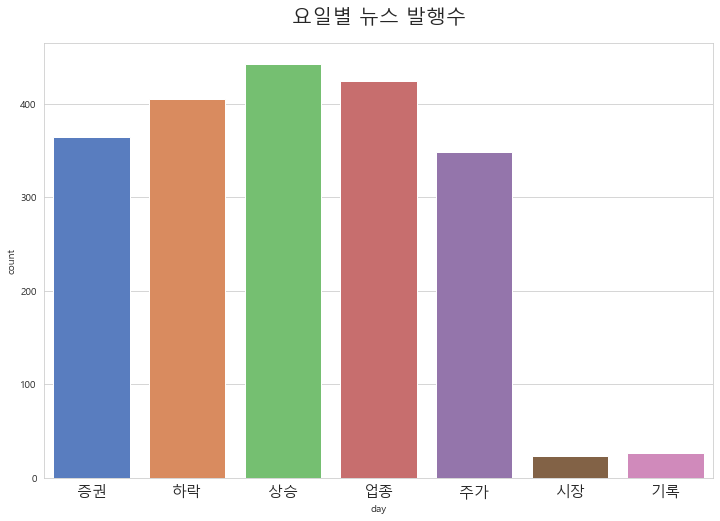

In [31]:
sns.set_palette("muted")
plt.figure(figsize=(12,8)) 
plt.title('요일별 뉴스 발행수',fontsize=20,pad=20)
sns.barplot(M.groupby('day').sum().index,M.groupby('day').sum()['count'])
plt.xticks(M.groupby('day').sum().index, labels, fontsize=15) 

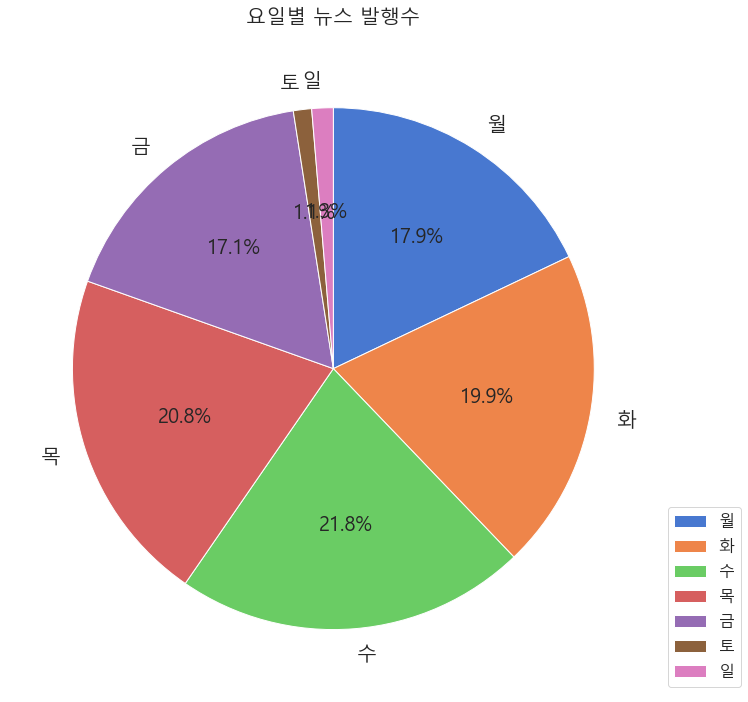

In [32]:
inn = [0,1,2,3,4,5,6]
labels = ['월','화','수','목','금','토','일'] 
plt.figure(figsize=(12,12)) 
plt.title('요일별 뉴스 발행수',fontsize=20,pad=20)
ratio = M.groupby('day').sum()['count']
plt.pie(ratio, labels=labels, startangle=90, autopct='%1.1f%%',textprops={"fontsize":20},counterclock=False,rotatelabels=False
       ,labeldistance=1.1,radius = 1,colors = sns.color_palette('muted'))  
plt.legend(fontsize=16,bbox_to_anchor=(1, 0.3)) 
plt.show()